Code for Variance Hammer's Doom of Mymeara Review
===
This code is for Variance Hammer's analysis of the *Doom of Mymeara*, particularly the weapons choices available for most Corsair infanty units. The text of the review itself is at: http://www.variancehammer.com/ . Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

**Import the necessary libraries**
These are easily obtained using the Anaconda Python Distribution, which is available free from http://www.continuum.io

In [118]:
%matplotlib inline
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

As there is no Variance Hammer library available (yet), we need to define a couple useful functions. DiceRoller() is a function to roll an arbitrary number of d6 dice. Shooting() does what it says on the tin - it takes a number of shots, rolls the appropriate number of d6 dice, checks those results against Ballistic Skill, and if the shots are twin-linked, rerolls as appropriate. Note that at the moment this function does not work for BS values above 6.

In [119]:
def DiceRoller(n_rolls):
	try:
		dice = int(n_rolls)
	except ValueError:
		print("Number of dice to roll needs to be an integer")
	rolls = np.random.random_integers(6, size=(1.,dice))
	return rolls

In [120]:
def Shooting(BS, n_shots, twinlinked):
    try:
        BS = int(BS)
    except ValueError:
        print("BS needs to be an integer")
    try:
        n_shots = int(n_shots)
    except ValueError:
        print("Number of shots needs to be an integer")
    if twinlinked == "Y":
        shots = DiceRoller(n_shots)
        shots[shots < (7-BS)] = rand.randint(1,6)
    elif twinlinked =="N":
        shots = DiceRoller(n_shots)
    else:
        print("Designate Twin-linking with Y or N. Assumed to be off.")
        shots = DiceRoller(n_shots)

    hits = np.sum(shots.__ge__(7-BS))
    return shots,hits

In [130]:
def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):
    try:
        toughness = int(toughness)
    except ValueError:
        print("Target toughness needs to be an integer")
    try:
        save = int(save)
    except ValueError:
        print("Save needs to be an integer (e.g. 3+ = 3)")
    try:
        n_hits = int(n_hits)
    except ValueError:
        print("The number of hits needs to be an integer")
    if strength == "D":
        pass
    elif strength == "D-1":
        pass
    else:
        try:
            strength = int(strength)
        except ValueError:
            print("Strength must be an integer or D")

    woundrolls = DiceRoller(n_hits)
    if rend ==1:
        auto == 6
    else:
        pass
    
    if auto == 0:
        SvTDiff = strength-toughness
        ToWound = max(2,4-SvTDiff)
        wounds = np.sum(woundrolls.__ge__(ToWound))
        saverolls = DiceRoller(wounds)
        unsaved = np.sum(saverolls<(save))
        finalwounds = unsaved
            
    else:
        SvTDiff = strength-toughness
        autowounds = np.sum(woundrolls>=auto)
        if rend == 1:
            rends = np.sum(woundrolls>=6)
        else:
            rends = 0  
        ToWound = max(2,4-SvTDiff)
        wounds = np.sum(woundrolls.__ge__(ToWound))
        if ToWound > 6:
            truewounds = autowounds
        else:
            truewounds = wounds
        saverolls = DiceRoller(truewounds-rends)
        if rend == 0:
            unsaved = np.sum(saverolls<(save))
        else:
            unsaved = np.sum(saverolls<(save))+rends
        finalwounds = unsaved
        
    return finalwounds

In [131]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
runs = 2500

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


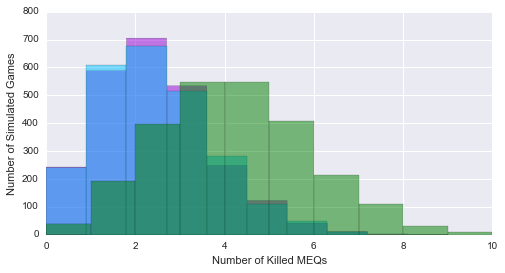

In [132]:
# def Shooting(BS, n_shots, twinlinked):
# def Wounding(strength,toughness,save,n_hits,woundspermodel,auto,rend):

def Lasblaster(save):
    Shots = Shooting(4,(3*10),'N')[1]
    Wounds = Wounding(3,4,save,Shots,1,rend=0,auto=0)
    return Wounds

def Splinter(save):
    Shots = Shooting(4,(2*10),'N')[1]
    Wounds = Wounding(1,4,save,Shots,1,rend=0,auto=4)
    return Wounds

def Shuriken(save):
    Shots = Shooting(4,(2*10),'N')[1]
    Wounds = Wounding(4,4,save,Shots,1,rend=1,auto=6)
    return Wounds

CorsairMEQ = np.empty([runs,3])

for i in range(runs):
    CorsairMEQ[i][0] = Lasblaster(3)
    CorsairMEQ[i][1] = Splinter(3)
    CorsairMEQ[i][2] = Shuriken(3)
                             
plt.hist(CorsairMEQ[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(CorsairMEQ[:,1],alpha=0.50,color="DeepSkyBlue")
plt.hist(CorsairMEQ[:,2],alpha=0.50,color="Green")
plt.xlabel("Number of Killed MEQs")
plt.ylabel("Number of Simulated Games")

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


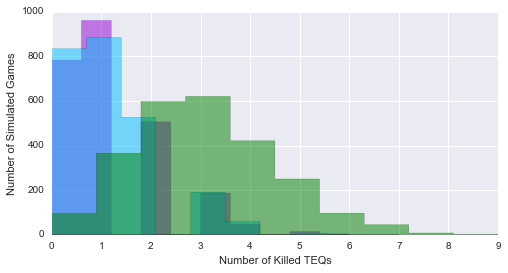

In [133]:
CorsairTEQ = np.empty([runs,3])

for i in range(runs):
    CorsairMEQ[i][0] = Lasblaster(2)
    CorsairMEQ[i][1] = Splinter(2)
    CorsairMEQ[i][2] = Shuriken(2)
                             
plt.hist(CorsairMEQ[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(CorsairMEQ[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.hist(CorsairMEQ[:,2],alpha=0.50,color="Green",histtype="stepfilled")
plt.xlabel("Number of Killed TEQs")
plt.ylabel("Number of Simulated Games")

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


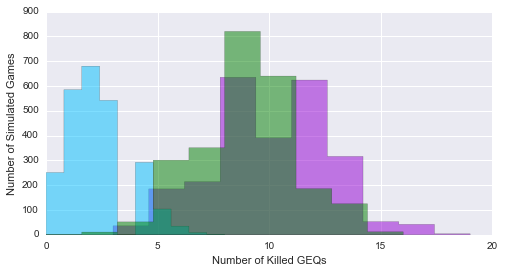

In [134]:
def Lasblaster2(save):
    Shots = Shooting(4,(3*10),'N')[1]
    Wounds = Wounding(3,3,save,Shots,1,rend=0,auto=0)
    return Wounds

def Splinter2(save):
    Shots = Shooting(4,(2*10),'N')[1]
    Wounds = Wounding(1,3,save,Shots,1,rend=0,auto=4)
    return Wounds

def Shuriken2(save):
    Shots = Shooting(4,(2*10),'N')[1]
    Wounds = Wounding(4,3,save,Shots,1,rend=1,auto=6)
    return Wounds

CorsairGEQ = np.empty([runs,3])

for i in range(runs):
    CorsairMEQ[i][0] = Lasblaster2(7)
    CorsairMEQ[i][1] = Splinter2(7)
    CorsairMEQ[i][2] = Shuriken2(7)
                             
plt.hist(CorsairMEQ[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(CorsairMEQ[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.hist(CorsairMEQ[:,2],alpha=0.50,color="Green",histtype="stepfilled")
plt.xlabel("Number of Killed GEQs")
plt.ylabel("Number of Simulated Games")

/Users/elofgren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


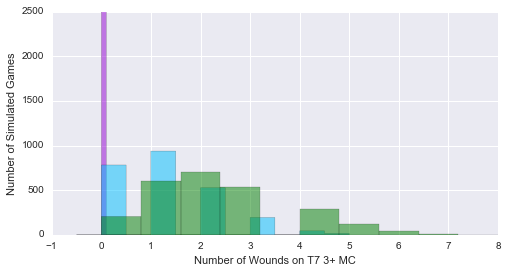

In [136]:
def Lasblaster3(save):
    Shots = Shooting(4,(3*10),'N')[1]
    Wounds = Wounding(3,7,save,Shots,1,rend=0,auto=0)
    return Wounds

def Splinter3(save):
    Shots = Shooting(4,(2*10),'N')[1]
    Wounds = Wounding(1,7,save,Shots,1,rend=0,auto=4)
    return Wounds

def Shuriken3(save):
    Shots = Shooting(4,(2*10),'N')[1]
    Wounds = Wounding(4,7,save,Shots,1,rend=1,auto=6)
    return Wounds

CorsairGEQ = np.empty([runs,3])

for n in range(runs):
    CorsairGEQ[n][0] = Lasblaster3(2)
    CorsairGEQ[n][1] = Splinter3(2)
    CorsairGEQ[n][2] = Shuriken3(2)
                             
plt.hist(CorsairGEQ[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(CorsairGEQ[:,1],alpha=0.50,color="DeepSkyBlue",histtype="stepfilled")
plt.hist(CorsairGEQ[:,2],alpha=0.50,color="Green")
plt.xlabel("Number of Wounds on T7 2+ MC")
plt.ylabel("Number of Simulated Games")